# HW 6 - Hongyi Tang

## 1 Who will win the elections

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

1.1

In [2]:
# load the data
election = pd.read_csv("../data/us-elections_2000-2020.csv.bz2", sep = "\t")
election.head(3)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


In [388]:
# checking the shape
print(election.shape)
# checking null values 
print(election.isna().sum())

(37390, 22)
FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
dtype: int64


1.2

In [389]:
# make a copy of the election data
election_copy = election.copy()

In [390]:
# fillna for each county with the latest income and population
election_copy["income"] = election_copy["income"].fillna(election_copy.groupby('FIPS')['income'].transform('last'))
election_copy["population"] = election_copy["population"].fillna(election_copy.groupby('FIPS')['population'].transform('last'))


In [391]:
election_copy.isna().sum()

FIPS                0
year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      4
totalvotes          0
income            644
population        644
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

1.3

In [392]:
testCase = election[election['population'].isnull()]
testCase
# FIPS 1001 have null value on their population (Autauga County, AL)
testAl = testCase[testCase.FIPS == 1001]
testAl[['year', 'income', 'population', 'FIPS', 'state', 'county']]
# Autauga County, AL has missing data on the year 2020

,year,income,population,FIPS,state,county
10,2020,NaN,NaN,1001,Alabama,Autauga County
11,2020,NaN,NaN,1001,Alabama,Autauga County


In [393]:
# find the latest population data for Autauga County, AL
al = election[election.FIPS == 1001]
latest = al.loc[al['population'].sort_values(ascending=False).index]
al[['year', 'population', 'state', 'county', 'FIPS']]
# the latest population is 55243.0 in 2016

,year,population,state,county,FIPS
0,2000,44021.0,Alabama,Autauga,1001
1,2000,44021.0,Alabama,Autauga,1001
2,2004,48366.0,Alabama,Autauga,1001
3,2004,48366.0,Alabama,Autauga,1001
4,2008,53277.0,Alabama,Autauga,1001
5,2008,53277.0,Alabama,Autauga,1001
6,2012,54954.0,Alabama,Autauga,1001
7,2012,54954.0,Alabama,Autauga,1001
8,2016,55243.0,Alabama,Autauga,1001
9,2016,55243.0,Alabama,Autauga,1001


In [394]:
election_copy_al = election_copy[election_copy.FIPS == 1001]
sort = election_copy_al[['year', 'population', 'income', 'state', 'county']].sort_values(ascending=False, by='year')
sort
# we can tell that the population and the income for 2020 have been filed with the 'lastest' 2016 data

,year,population,income,state,county
10,2020,55243.0,39883.0,Alabama,Autauga County
11,2020,55243.0,39883.0,Alabama,Autauga County
8,2016,55243.0,39883.0,Alabama,Autauga
9,2016,55243.0,39883.0,Alabama,Autauga
6,2012,54954.0,35067.0,Alabama,Autauga
7,2012,54954.0,35067.0,Alabama,Autauga
4,2008,53277.0,32863.0,Alabama,Autauga
5,2008,53277.0,32863.0,Alabama,Autauga
2,2004,48366.0,27542.0,Alabama,Autauga
3,2004,48366.0,27542.0,Alabama,Autauga


1.4

In [395]:
null = election_copy[election_copy.population.isnull()]
cleaned = null[['FIPS', 'state','year','county', 'population', 'income']]
cleaned[cleaned.FIPS == 15009]

,FIPS,state,year,county,population,income
6268,15009,Hawaii,2000,Maui,NaN,NaN
6269,15009,Hawaii,2000,Maui,NaN,NaN
6270,15009,Hawaii,2004,Maui,NaN,NaN
6271,15009,Hawaii,2004,Maui,NaN,NaN
6272,15009,Hawaii,2008,Maui,NaN,NaN
6273,15009,Hawaii,2008,Maui,NaN,NaN
6274,15009,Hawaii,2012,Maui,NaN,NaN
6275,15009,Hawaii,2012,Maui,NaN,NaN
6276,15009,Hawaii,2016,Maui,NaN,NaN
6277,15009,Hawaii,2016,Maui,NaN,NaN


In [396]:
# compare with the original dataset
row = election[election.FIPS == 15009]
row_cleaned = row[['FIPS', 'state','year','county', 'population', 'income']]
row_cleaned

,FIPS,state,year,county,population,income
6268,15009,Hawaii,2000,Maui,NaN,NaN
6269,15009,Hawaii,2000,Maui,NaN,NaN
6270,15009,Hawaii,2004,Maui,NaN,NaN
6271,15009,Hawaii,2004,Maui,NaN,NaN
6272,15009,Hawaii,2008,Maui,NaN,NaN
6273,15009,Hawaii,2008,Maui,NaN,NaN
6274,15009,Hawaii,2012,Maui,NaN,NaN
6275,15009,Hawaii,2012,Maui,NaN,NaN
6276,15009,Hawaii,2016,Maui,NaN,NaN
6277,15009,Hawaii,2016,Maui,NaN,NaN


From this comparsion, we can tell that even after filling in N/As there are still a few missing is because there was no data at all at the begining. There is no previous value for those columns

1.5

In [415]:
election_2020 = election_copy[election_copy['year'] == 2020]
election_2020_cleaned = election_2020[['FIPS', 'year', 'state', 
                                       'county', 'candidate', 
                                       'party', 'candidatevotes', 
                                       'population', 'LND010200D', 
                                       'EDU600209D','EDU695209D',
                                      'region', 'income']]
election_2020_cleaned

,FIPS,year,state,county,candidate,party,candidatevotes,population,LND010200D,EDU600209D,EDU695209D,region,income
10,1001,2020,Alabama,Autauga County,Donald Trump,republican,19838.0,55243.0,604.45,31469,2285,south,39883.0
11,1001,2020,Alabama,Autauga County,Joshep Biden,democrat,7503.0,55243.0,604.45,31469,2285,south,39883.0
22,1003,2020,Alabama,Baldwin County,Donald Trump,republican,83544.0,207601.0,2026.93,118585,10855,south,43143.0
23,1003,2020,Alabama,Baldwin County,Joshep Biden,democrat,24578.0,207601.0,2026.93,118585,10855,south,43143.0
34,1005,2020,Alabama,Barbour County,Donald Trump,republican,5622.0,25806.0,904.52,19791,1048,south,31932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37365,56041,2020,Wyoming,Uinta County,Joshep Biden,democrat,1591.0,20682.0,2087.56,12236,634,west,37731.0
37376,56043,2020,Wyoming,Washakie County,Donald Trump,republican,3245.0,8165.0,2242.75,5152,430,west,43615.0
37377,56043,2020,Wyoming,Washakie County,Joshep Biden,democrat,651.0,8165.0,2242.75,5152,430,west,43615.0
37388,56045,2020,Wyoming,Weston County,Donald Trump,republican,3107.0,7220.0,2400.07,4681,156,west,41990.0


In [416]:
republican = election_2020_cleaned[election_2020_cleaned['party'] == 'republican'].reset_index()
democrat = election_2020_cleaned[election_2020_cleaned['party'] == 'democrat'].reset_index()

In [417]:
print(republican.shape)
print(democrat.shape)

(3111, 14)
(3111, 14)


In [418]:
# checking who's winning
winning = democrat.candidatevotes > republican.candidatevotes
winning

0       False
1       False
2       False
3       False
4       False
        ...  
3106    False
3107     True
3108    False
3109    False
3110    False
Name: candidatevotes, Length: 3111, dtype: bool

In [419]:
# adding the binary winning column
democrat['democrat_won'] = winning
republican['democrat_won'] = winning

In [420]:
# combine two columns and sort them based on FIPS to make it looks like the old format
combined = pd.concat([democrat,republican])
combined = combined.sort_values(['FIPS'], ascending=True)
combined = combined.drop('index', 1)
combined = combined.reset_index().drop('index', 1)
combined

,FIPS,year,state,county,candidate,party,candidatevotes,population,LND010200D,EDU600209D,EDU695209D,region,income,democrat_won
0,1001,2020,Alabama,Autauga County,Joshep Biden,democrat,7503.0,55243.0,604.45,31469,2285,south,39883.0,False
1,1001,2020,Alabama,Autauga County,Donald Trump,republican,19838.0,55243.0,604.45,31469,2285,south,39883.0,False
2,1003,2020,Alabama,Baldwin County,Joshep Biden,democrat,24578.0,207601.0,2026.93,118585,10855,south,43143.0,False
3,1003,2020,Alabama,Baldwin County,Donald Trump,republican,83544.0,207601.0,2026.93,118585,10855,south,43143.0,False
4,1005,2020,Alabama,Barbour County,Joshep Biden,democrat,4816.0,25806.0,904.52,19791,1048,south,31932.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,56041,2020,Wyoming,Uinta County,Joshep Biden,democrat,1591.0,20682.0,2087.56,12236,634,west,37731.0,False
6218,56043,2020,Wyoming,Washakie County,Donald Trump,republican,3245.0,8165.0,2242.75,5152,430,west,43615.0,False
6219,56043,2020,Wyoming,Washakie County,Joshep Biden,democrat,651.0,8165.0,2242.75,5152,430,west,43615.0,False
6220,56045,2020,Wyoming,Weston County,Joshep Biden,democrat,360.0,7220.0,2400.07,4681,156,west,41990.0,False


1.6

In [421]:
# add population density column
population_density = combined.population / combined.LND010200D
combined['population_density'] = population_density

In [422]:
# add college grads column
college_grads = combined.EDU695209D / combined.EDU600209D 
combined['college_grads'] = college_grads

1.7

In [423]:
# check on the edge cases for population density 
combined.population_density.describe()

count     6116.000000
mean       207.528610
std               NaN
min          0.172860
25%         16.352130
50%         41.791863
75%        104.196667
max      48428.871780
Name: population_density, dtype: float64

In [424]:
# There are N/As for population_density
combined.population_density.sort_values(ascending=False)

3657    48428.871780
3656    48428.871780
3642    26918.710010
3643    26918.710010
3600    25150.914156
            ...     
5839             NaN
5840             NaN
5841             NaN
5842             NaN
5843             NaN
Name: population_density, Length: 6222, dtype: float64

In [425]:
# check edge cases for college_grads
combined.college_grads.describe()

count    6222.000000
mean        0.063346
std         0.037887
min         0.000000
25%         0.039806
50%         0.052162
75%         0.074952
max         0.384636
Name: college_grads, dtype: float64

In [426]:
combined_clean = combined.dropna()

In [428]:
# check the cleaned version of the combined table
combined_clean.describe()

,FIPS,year,candidatevotes,population,LND010200D,EDU600209D,EDU695209D,income,population_density,college_grads
count,6116.000000,6116.0,6.116000e+03,6.116000e+03,6116.000000,6.116000e+03,6116.000000,6116.000000,6116.000000,6116.000000
mean,30312.841073,2020.0,2.505612e+04,1.041480e+05,1018.513659,6.372035e+04,6406.266187,40893.312950,207.528610,0.062572
std,14860.484906,0.0,7.940306e+04,3.338124e+05,1336.261786,2.029396e+05,24121.869554,11257.602013,1264.529195,0.036388
min,1001.000000,2020.0,4.000000e+00,1.170000e+02,15.410000,7.700000e+01,0.000000,18183.000000,0.172860,0.000000
25%,19015.000000,2020.0,2.147250e+03,1.110000e+04,452.310000,7.525000e+03,321.000000,34026.000000,16.352130,0.039643
50%,29156.000000,2020.0,5.793500e+03,2.588200e+04,653.455000,1.707200e+04,854.000000,38761.500000,41.791863,0.051964
75%,45019.000000,2020.0,1.683200e+04,6.847300e+04,981.330000,4.367500e+04,2907.000000,45053.000000,104.196667,0.074242
max,56045.000000,2020.0,3.028885e+06,1.010571e+07,20105.320000,6.266988e+06,608186.000000,205843.000000,48428.871780,0.370056


1.8

In [431]:
reg = combined_clean[['FIPS','democrat_won', 'population_density', 
                      'college_grads', 'income', 'region']]
reg

,FIPS,democrat_won,population_density,college_grads,income,region
0,1001,False,91.393829,0.072611,39883.0,south
1,1001,False,91.393829,0.072611,39883.0,south
2,1003,False,102.421396,0.091538,43143.0,south
3,1003,False,102.421396,0.091538,43143.0,south
4,1005,False,28.530049,0.052953,31932.0,south
...,...,...,...,...,...,...
6217,56041,False,9.907260,0.051814,37731.0,west
6218,56043,False,3.640620,0.083463,43615.0,west
6219,56043,False,3.640620,0.083463,43615.0,west
6220,56045,False,3.008246,0.033326,41990.0,west


In [438]:
W = reg.democrat_won.astype(int)
m = smf.logit('W ~ population_density+college_grads+income+region', data=reg).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.305261
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      W   No. Observations:                 6116
Model:                          Logit   Df Residuals:                     6109
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Feb 2022   Pseudo R-squ.:                  0.3228
Time:                        11:34:26   Log-Likelihood:                -1867.0
converged:                       True   LL-Null:                       -2756.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.6882      0.205    -18.022      0.000      -4.089      -3.287
region[T.northeast]     1.2872      0.155      8.282      0.000       0.983       1.592
region[T.south]         0.6103      0.116      5.247      0.000       0.382       0.838
region[T.west]          1.5085      0.132     11.433      0.000       1.250       1.767
population_density      0.0024      0.000     13.342      0.000       0.002       0.003
college_grads          28.1660      1.569     17.952      0.000      25.091      31.241
income              -2.664e-05   5.08e-06     -5.242      0.000   -3.66e-05   -1.67e-05
=======================================================================================
"""

In [440]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      W
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
region[T.northeast]     0.1151      0.014      8.327      0.000       0.088       0.142
region[T.south]         0.0546      0.010      5.243      0.000       0.034       0.075
region[T.west]          0.1349      0.012     11.519      0.000       0.112       0.158
population_density      0.0002   1.58e-05     13.866      0.000       0.000       0.000
college_grads           2.5185      0.132     19.082      0.000       2.260       2.777
income              -2.382e-06   4.53e-07     -5.257      0.000   -3.27e-06   -1.49e-06
=======================================================================================
"""

1.9

## 2 Model Airbnb Price

In [87]:
airbnb = pd.read_csv("../data/airbnb-beijing-listings.csv.bz2", sep=",", \
                     usecols=['price', 'bedrooms', 'room_type', 'accommodates', 'bathrooms','host_is_superhost'])
airbnb.head(3)

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,price
0,f,Entire home/apt,9,2.0,3.0,$831.00
1,f,Private room,2,1.0,1.0,"$1,197.00"
2,t,Entire home/apt,2,1.0,1.0,$598.00


In [19]:
airbnb.shape

(38814, 6)

2.2

In [93]:
#(a) convert price to numeric.
airbnb['price'] = airbnb['price'].replace({'\$':'' , ',':''}, regex=True)
airbnb.price = airbnb.price.astype(float)


In [95]:
airbnb.head(3)

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,price
0,f,Entire home/apt,9,2.0,3.0,831.0
1,f,Private room,2,1.0,1.0,1197.0
2,t,Entire home/apt,2,1.0,1.0,598.0


In [98]:
#(b) remove missings 
airbnb.isna().sum()

host_is_superhost     72
room_type              0
accommodates           0
bathrooms              7
bedrooms             114
price                  0
dtype: int64

In [99]:
airbnb = airbnb.dropna()

In [100]:
# airbnb after dropping missing
airbnb.shape

(38623, 6)

In [114]:
airbnb.isna().sum()

host_is_superhost    0
room_type            0
accommodates         0
bathrooms            0
bedrooms             0
price                0
dtype: int64

In [116]:
print(airbnb.host_is_superhost.value_counts())
print()
print(airbnb.room_type.value_counts())
print()
print(airbnb.accommodates.value_counts())
print()
print(airbnb.bathrooms.describe())
print()
print(airbnb.bedrooms.describe())
print()
print(airbnb.price.describe())

f    27506
t    11117
Name: host_is_superhost, dtype: int64

Entire home/apt    23794
Private room       13035
Shared room         1794
Name: room_type, dtype: int64

2     17084
4      7188
3      3235
1      2869
6      2690
5      1542
8       976
16      885
10      590
7       541
12      384
9       229
14      134
15      119
13       83
11       73
34        1
Name: accommodates, dtype: int64

count    38623.000000
mean         1.388577
std          1.242420
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max        101.500000
Name: bathrooms, dtype: float64

count    38623.000000
mean         1.637030
std          1.411708
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

count    38623.000000
mean       691.507521
std       1732.484382
min          0.000000
25%        260.000000
50%        401.000000
75%        619.000000
max      71603.000000
Na

In [144]:
# filter out airbnbs where price is 0 
airbnb_cleaned = airbnb[airbnb['price'] !=0]
airbnb_cleaned.shape

(38614, 6)

After droping all N/A values, there are no invalid entry in our airbnb data anymore. I checked the value counts for category variable and used describe function for the numeric variables. No invalid pirce(price < 0 and price is not 0 ), no invalid bedrooms(bedrooms < 0), no invalid bathrooms(bathroom < 0), no invalid accomdates (accomdates < 0), and no invalid values for categorical variables like host_is_superhost and room_type

2.3

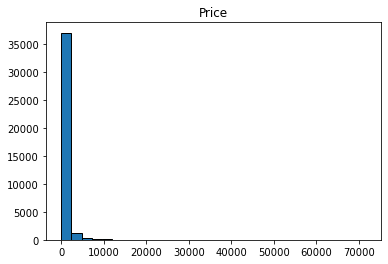

In [161]:
_ = plt.hist(airbnb_cleaned["price"], edgecolor="black", bins=30)
_ = plt.title("Price")

The price distribution doesn't look normal. It looks like it is heavliy left skewed. I suggest to do a log-transformation

2.4

In [146]:
airbnb_cleaned_copy = airbnb_cleaned.copy()
airbnb_cleaned_copy['bedroom_catgory'] = pd.cut(airbnb_cleaned_copy.bedrooms, 
                                               bins = [-1, 0, 1, 2, 3, 100],
                                               labels= ['0', '1', '2', '3', '4+'])
airbnb_cleaned_copy.head(3)

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,price,bedroom_catgory
0,f,Entire home/apt,9,2.0,3.0,831.0,3
1,f,Private room,2,1.0,1.0,1197.0,1
2,t,Entire home/apt,2,1.0,1.0,598.0,1


2.5

In [147]:
reg = smf.ols("price ~ bedroom_catgory", data=airbnb_cleaned_copy).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:10:35   Log-Likelihood:            -3.4067e+05
No. Observations:               38614   AIC:                         6.814e+05
Df Residuals:                   38609   BIC:                         6.814e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               448.8851    107.114      4.191      0.000     238.938     658.832
bedroom_catgory[T.1]    -12.6220    107.604     -0.117      0.907    -223.528     198.284
bedroom_catgory[T.2]    296.7272    108.755      2.728      0.006      83.564     509.890
bedroom_catgory[T.3]    745.7844    111.917      6.664      0.000     526.424     965.145
bedroom_catgory[T.4+]  2169.7574    111.945     19.382      0.000    1950.342    2389.172
==============================================================================
Omnibus:                    95769.199   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1548138818.391
Skew:                          26.937   Prob(JB):                         0.00
Kurtosis:                     982.450   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression table indicates that when there 0 bedroom, the average price is 448.8851. When there is one bedroom, the price goes down 12.6220 on average. Just like that, when there are two bedrooms, the price would go up for another 296.7272, the price would go up for 745.7844 for three bedrooms, and the the price would go up for 2169.7574 for four and more bedrooms on average. 

only the result for one bedroom is not statistically significant (p value is too big, 0.907) while others are all statistically significant (very small p values)

the R^2 for this model is pretty small(0.102) which means this model can only explain a small portion of total variation in data.

2.6

In [148]:
# log the price
airbnb_cleaned_copy['price'] = np.log(airbnb_cleaned_copy['price'])

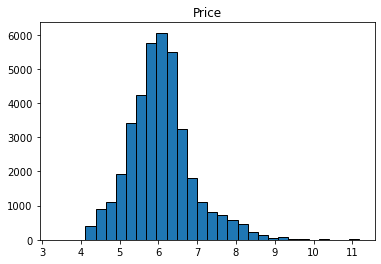

In [159]:
# distribution of log(price)
_ = plt.hist(airbnb_cleaned_copy["price"], edgecolor="black", bins=30)
_ = plt.title("Price")

In [149]:
reg2 = smf.ols("price ~ bedroom_catgory", data=airbnb_cleaned_copy).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     4574.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:10:41   Log-Likelihood:                -39967.
No. Observations:               38614   AIC:                         7.994e+04
Df Residuals:                   38609   BIC:                         7.999e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.8117      0.044    130.777      0.000       5.725       5.899
bedroom_catgory[T.1]     -0.0326      0.045     -0.731      0.465      -0.120       0.055
bedroom_catgory[T.2]      0.5310      0.045     11.768      0.000       0.443       0.619
bedroom_catgory[T.3]      0.9394      0.046     20.231      0.000       0.848       1.030
bedroom_catgory[T.4+]     1.5949      0.046     34.341      0.000       1.504       1.686
==============================================================================
Omnibus:                     3819.053   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16566.368
Skew:                           0.412   Prob(JB):                         0.00
Kurtosis:                       6.101   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression table indicates that when there 0 bedroom, the average log price is 5.8117. When there is one bedroom, the log price goes down 0.0326 on average. Just like that, when there are two bedrooms, the log price would go up for 0.5310, the log price would go up for 0.9394 for three bedrooms, and the log price would go up for 1.5949 for four and more bedrooms on average. 

only the result for one bedroom is not statistically significant (p value is too big, 0.465) while others are all statistically significant (very small p values)

log price model behaves better in sense of R^2. the R^2 is 0.322, a lot better than the price model

2.7

In [150]:
airbnb_ul = airbnb_cleaned_copy.copy()
airbnb_ul['accommodates'] = pd.cut(airbnb_ul.accommodates, 
                                               bins = [ 0, 1, 2, 3, 1000],
                                               labels= ['1', '2', '3', '4+'])

In [151]:
airbnb_ul['bathrooms'] = pd.cut(airbnb_ul.bathrooms, 
                                               bins = [ -1, 0, 1, 2, 100],
                                               labels= ["0",'1', '2', '3+'])

In [153]:
airbnb_ul.head(5)

,host_is_superhost,room_type,accommodates,bathrooms,bedrooms,price,bedroom_catgory
0,f,Entire home/apt,4+,2,3.0,6.722630,3
1,f,Private room,2,1,1.0,7.087574,1
2,t,Entire home/apt,2,1,1.0,6.393591,1
3,t,Entire home/apt,2,1,1.0,6.393591,1
4,t,Entire home/apt,2,1,1.0,6.393591,1


In [154]:
reg2 = smf.ols("price ~ bedroom_catgory + accommodates + room_type + bathrooms", data=airbnb_ul).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2723.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:28:21   Log-Likelihood:                -35615.
No. Observations:               38613   AIC:                         7.126e+04
Df Residuals:                   38600   BIC:                         7.137e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.5801      0.062     89.815      0.000       5.458       5.702
bedroom_catgory[T.1]          0.0553      0.040      1.386      0.166      -0.023       0.134
bedroom_catgory[T.2]          0.1900      0.041      4.644      0.000       0.110       0.270
bedroom_catgory[T.3]          0.4917      0.042     11.632      0.000       0.409       0.575
bedroom_catgory[T.4+]         0.8731      0.044     19.945      0.000       0.787       0.959
accommodates[T.2]             0.3321      0.013     24.638      0.000       0.306       0.359
accommodates[T.3]             0.3935      0.017     23.646      0.000       0.361       0.426
accommodates[T.4+]            0.6087      0.015     39.342      0.000       0.578       0.639
room_type[T.Private room]    -0.3243      0.007    -43.874      0.000      -0.339      -0.310
room_type[T.Shared room]     -0.9507      0.017    -56.418      0.000      -0.984      -0.918
bathrooms[T.1]             2.267e-05      0.047      0.000      1.000      -0.092       0.092
bathrooms[T.2]                0.0343      0.047      0.722      0.470      -0.059       0.127
bathrooms[T.3+]               0.5907      0.050     11.883      0.000       0.493       0.688
==============================================================================
Omnibus:                     8914.379   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51799.993
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       8.320   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reference categories are 0 bedroom, 1 accomodate, entire home, and 0 bathroom

This model behaves the best in terms of R^2 out of all models. The R^2 is a lot bigger than the previous two models. R^2 for this model is 0.458. Therefore, this model can only explain a larger portion (largest out of all three models) of total variation in data.

Most variables are statistically significant excpet 1 bedroom, 1 bathroom, and two bathrooms

The regression table indicates that when there 0 bedroom, 1 accomodate, entire home, and 0 bathroom. 

    For bedrooms, the average log price is 5.5801. When there is one bedroom, the log price goes up 0.0553 on average. Just like that, when there are two bedrooms, the log price would go up for 0.1900, the log price would go up for 0.4917 for three bedrooms, and the log price would go up for 0.8731 for four and more bedrooms on average. 

    For accomodates, the price will go up 0.3321 for two bedrooms, go up 0.3935 for three bedrooms, and go up 0.6087 for 4+ bedrooms. 
    
    For room types, the price will go down 0.3243 if it is a private room, and the price will also go down 0.9507 if it is a shared room.
    
    For bathrooms, the price will go 2.267e-05 if it is a one bathroom, the price will go up 0.0343 if there are two bathrooms, and the price will go up 0.5907 if there are three bathrooms 
  

## Total hours: 15hrs